In [1]:
import tensorflow as tf

batch_size = 32
seed = 42

# Загрузка тренировочного датасета
train_dir = 'C:/Users/Jabrail/Desktop/homework 3/bd/train'
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

# Загрузка валидационного датасета
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

# Загрузка тестового датасета
test_dir = 'C:/Users/Jabrail/Desktop/homework 3/bd/test'
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    test_dir,
    batch_size=batch_size)


Found 8000 files belonging to 4 classes.
Using 6400 files for training.
Found 8000 files belonging to 4 classes.
Using 1600 files for validation.
Found 8000 files belonging to 4 classes.


In [3]:
max_features = 10000  # Максимальное количество токенов
sequence_length = 250  # Максимальная длина последовательности

vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

# Применяем адаптацию к тренировочным данным
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)


In [6]:
num_classes = 4
embedding_dim = 100  # Размерность векторов эмбеддинга

model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(max_features + 1, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epochs = 10

history = model.fit(
    raw_train_ds,
    validation_data=raw_val_ds,
    epochs=epochs)

Epoch 1/10
200/200 [==============================] - 4s 17ms/step - loss: 1.3580 - accuracy: 0.3833 - val_loss: 1.3119 - val_accuracy: 0.5800
Epoch 2/10
200/200 [==============================] - 3s 13ms/step - loss: 1.2284 - accuracy: 0.5858 - val_loss: 1.1348 - val_accuracy: 0.6587
Epoch 3/10
200/200 [==============================] - 3s 14ms/step - loss: 1.0314 - accuracy: 0.6919 - val_loss: 0.9581 - val_accuracy: 0.7337
Epoch 4/10
200/200 [==============================] - 3s 14ms/step - loss: 0.8606 - accuracy: 0.7595 - val_loss: 0.8216 - val_accuracy: 0.7569
Epoch 5/10
200/200 [==============================] - 3s 14ms/step - loss: 0.7333 - accuracy: 0.7920 - val_loss: 0.7337 - val_accuracy: 0.7837
Epoch 6/10
200/200 [==============================] - 3s 14ms/step - loss: 0.6411 - accuracy: 0.8192 - val_loss: 0.6683 - val_accuracy: 0.7944
Epoch 7/10
200/200 [==============================] - 3s 14ms/step - loss: 0.5691 - accuracy: 0.8445 - val_loss: 0.6216 - val_accuracy: 0.8012

In [7]:
loss, accuracy = model.evaluate(raw_test_ds)
print("Loss:", loss)
print("Accuracy:", accuracy)

250/250 [==============================] - 5s 18ms/step - loss: 0.5840 - accuracy: 0.7940
Loss: 0.5839568972587585
Accuracy: 0.7940000295639038


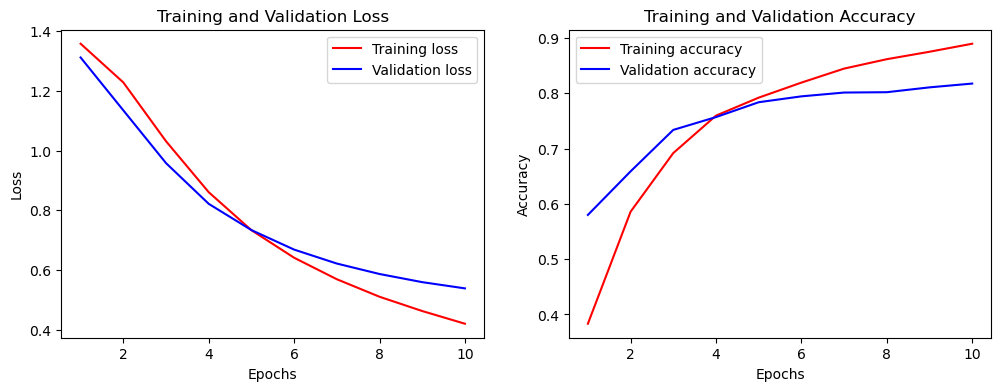

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history

# Извлекаем метрики
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# График потерь
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()